# Performing the Neural Network Model


Creating the Neural Network model and measuring the performance of the model. We have already performed the data exploring in the Random Forest notebook. We will proceed with exporting the dataset and training and testing the model. 

## Importing libraries and exporting data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd()
nfl_combined_data_dir_path = os.path.join(path, '..\\nfl_combined_data')
files = os.listdir(nfl_combined_data_dir_path)

# Reading the first file. This file will be merged with the other  
# files to create the combined file
file = os.path.join(nfl_combined_data_dir_path, files[0])
df = pd.read_excel(file)
df.head(5)

,Unnamed: 0,Home,Away,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
0,0,PIT,TEN,35.0,17.5,23,-3,6,6,20,...,5,2,2,0,2,0,5,12,3,55
1,1,BAL,KC,37.5,17.0,62,-14,45,31,24,...,4,8,5,2,7,0,3,8,3,42
2,2,CAR,PHI,44.5,20.5,48,28,7,7,26,...,7,6,2,2,4,0,3,8,4,31
3,3,CIN,DEN,44.5,19.5,19,5,16,16,21,...,6,2,1,1,1,1,2,15,2,38
4,4,CLE,MIN,39.5,19.0,54,14,31,31,21,...,9,6,2,3,5,0,4,11,3,35


## Dataset cleaning and changing 

Merging the datasets to combine them into a single dataset.

In [3]:
frames = [] # Store the dataframes to merge to final dataframe

# Opening files and merging the files to make one file.
for i in range(1, len(files)):
    file = os.path.join(nfl_combined_data_dir_path, files[i])
    df_temp = pd.read_excel(file)
    frames.append(df_temp)
    
df = pd.concat(frames)

In [4]:
df.tail(5)

,Unnamed: 0,Home,Away,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
219,219,KC,LAC,48.0,23.0,52,-10,35,7,21,...,3,7,3,3,7,0,1,5,0,47
220,220,LA,ARI,49.0,22.5,55,-7,28,28,30,...,2,7,5,2,7,0,3,7,3,56
221,221,DEN,OAK,41.5,20.5,31,-1,18,12,28,...,4,2,2,0,1,1,8,8,7,46
222,222,PHI,SEA,46.0,20.0,26,8,13,1,21,...,9,3,2,1,2,1,2,11,6,46
223,223,KC,HOU,48.0,27.0,82,-20,30,4,25,...,1,7,4,3,6,1,4,2,2,49


Checking the dataset and seeing what values we are working with. We see that most of the values are int64 or float64 types. The other 2, Home and Away, are object types. Those are our categorical values we will need to encode. And there is one feature we will drop, which is the "Unnamed" feature. We also notice that there are no null features, which means we will not need to impute the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 223
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2107 non-null   int64  
 1   Home                  2107 non-null   object 
 2   Away                  2107 non-null   object 
 3   OU                    2107 non-null   float64
 4   OU 2H                 2107 non-null   float64
 5   Total Points          2107 non-null   int64  
 6   Win Margin            2107 non-null   int64  
 7   Total Points 2H       2107 non-null   int64  
 8   Win Margin 2H         2107 non-null   int64  
 9   Incomplete Passes     2107 non-null   int64  
 10  Touchbacks            2107 non-null   int64  
 11  Interceptions         2107 non-null   int64  
 12  Fumble Forced         2107 non-null   int64  
 13  Fumble Not Forced     2107 non-null   int64  
 14  Safety                2107 non-null   int64  
 15  Penalty               

Seeing the size of the dataset. It shows that there are 2107 datapoints with 29 features. However, we are dropping one feature, which will not be need in the dataset.

In [6]:
df.shape

(2107, 29)

In [7]:
df = df.drop('Unnamed: 0', axis=1) # Dropping the "Unnamed column"

In [8]:
df.sample(5, random_state=0)

,Home,Away,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,Touchbacks,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
59,CAR,TB,46.0,23.5,31,3,25,-3,20,8,...,2,3,1,2,2,1,6,9,3,36
169,GB,WAS,42.0,20.5,35,-5,15,9,20,8,...,8,4,2,2,3,1,3,10,3,34
46,BUF,NYG,48.0,23.0,34,14,15,15,27,3,...,3,4,4,0,3,1,3,15,3,48
56,SF,ARI,41.0,20.0,46,10,26,26,33,7,...,5,7,3,3,3,3,1,12,5,44
28,MIA,CLE,42.5,22.0,54,-6,25,11,26,8,...,5,6,3,2,3,1,7,11,4,49


Getting the columns of the dataset. These are the features we are going to be using for our model.

In [9]:
df.columns

Index(['Home', 'Away', 'OU', 'OU 2H', 'Total Points', 'Win Margin',
       'Total Points 2H', 'Win Margin 2H', 'Incomplete Passes', 'Touchbacks',
       'Interceptions', 'Fumble Forced', 'Fumble Not Forced', 'Safety',
       'Penalty', 'Tackled For Loss', 'Rush Attempts', 'Pass Attempts', 'Sack',
       'Touchdowns', 'Pass Touchdowns', 'Rush Touchdowns',
       'Extra Point Attempts', 'Two Point Attempts', 'Field Goal Attempts',
       'Punt Attempts', 'Fumble', 'Complete Passes'],
      dtype='object')

We wanted to see the statistical information that pertains to our dataset. We wanted to make sure that our dataset is useful and will help in our predictions. In this case, when looking at the mean of OU, the mean is 45.195. That would indicate that the an NFL game would be predicted by the sports books to be about 45 points, which can be the case. There are series of NFL games where both teams have scored in total 45 or more points. Seeing that, the data seems reasonable and will be helpful in training the model.

In [10]:
df.describe()

,OU,OU 2H,Total Points,Win Margin,Total Points 2H,Win Margin 2H,Incomplete Passes,Touchbacks,Interceptions,Fumble Forced,...,Sack,Touchdowns,Pass Touchdowns,Rush Touchdowns,Extra Point Attempts,Two Point Attempts,Field Goal Attempts,Punt Attempts,Fumble,Complete Passes
count,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,...,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000,2107.000000
mean,45.195301,22.353109,45.661130,-2.355007,22.470337,12.464642,24.552444,5.940674,1.783579,1.687708,...,4.686284,5.142857,3.122924,1.608448,4.494067,0.300427,3.877551,9.293783,2.517323,43.420503
std,4.206470,3.148794,13.928219,14.610070,9.827547,10.578475,6.140294,2.842626,1.315282,1.320183,...,2.339799,2.133930,1.773387,1.253290,2.000080,0.608904,1.786359,3.261414,1.649213,8.248671
min,8.000000,16.000000,6.000000,-58.000000,0.000000,-21.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000
25%,42.500000,20.500000,36.000000,-10.500000,16.000000,6.000000,20.000000,4.000000,1.000000,1.000000,...,3.000000,4.000000,2.000000,1.000000,3.000000,0.000000,3.000000,7.000000,1.000000,38.000000
50%,45.000000,21.500000,45.000000,-3.000000,21.000000,12.000000,24.000000,6.000000,2.000000,1.000000,...,4.000000,5.000000,3.000000,1.000000,4.000000,0.000000,4.000000,9.000000,2.000000,43.000000
75%,47.750000,24.000000,54.000000,7.000000,28.000000,20.000000,28.000000,8.000000,3.000000,2.000000,...,6.000000,7.000000,4.000000,2.000000,6.000000,0.000000,5.000000,11.000000,3.000000,48.000000
max,60.500000,56.000000,101.000000,49.000000,59.000000,57.000000,48.000000,16.000000,8.000000,7.000000,...,15.000000,14.000000,13.000000,7.000000,13.000000,6.000000,11.000000,21.000000,11.000000,92.000000


## Transforming the dataset

Since we have categorical values, we need to encode the features using OneHotEncoder function.

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

print(df['Home'].values)
print(df['Away'].values)

ohe_tfmr = OneHotEncoder(sparse=False)
print(ohe_tfmr.fit_transform(df[['Home']].values))
print(ohe_tfmr.fit_transform(df[['Away']].values))

['NO' 'NYG' 'CHI' ... 'DEN' 'PHI' 'KC']
['MIN' 'CAR' 'DET' ... 'OAK' 'SEA' 'HOU']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Feature values
categorical_features = ["Home", "Away"]

numerical_features = ["OU", "OU 2H", "Win Margin", "Total Points 2H", "Win Margin 2H",
                "Incomplete Passes", "Touchbacks", "Interceptions", "Fumble Forced",
                "Fumble Not Forced", "Safety", "Penalty", "Tackled For Loss", "Rush Attempts", "Pass Attempts",
                "Sack", "Touchdowns", "Pass Touchdowns", "Rush Touchdowns", "Extra Point Attempts",
                "Two Point Attempts", "Field Goal Attempts", "Punt Attempts", "Fumble", "Complete Passes"]

target = "Total Points"

Creating the pipeline that will encode the categorical values and impute (although we don't have null values, we should assume there are some). We need to scale the dataset when training the neural network so that the model will work.

In [13]:
# Handling categorical values.
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_features)]

# Handling numerical values
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
# num_scl_step = ('scl', StandardScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, numerical_features)]

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_features + numerical_features])

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Home', 'Away']),
                                ('num',
                                 Pipeline(steps=[('si',
                                                  SimpleImputer(strategy='median')),
                                                 ('scl', MinMaxScaler())]),
                                 ['OU', 'OU 2H', 'Win Margin',
                                  'Total Points 2H', 'Win Margin 2H',
                                  'Incomplete Passes', 'Touchbacks',
                                  'Interceptions', 'Fumble Forced',
                                  'Fumble Not Forced', 'Safety', 'Penalty',
                                  'Tackled For Loss', 'Rush Attempts',
      

## Splitting the training and test set 

In [14]:
from sklearn.model_selection import train_test_split

X = ct.transform(df[categorical_features + numerical_features])
X

array([[0.        , 0.        , 0.        , ..., 0.55      , 0.18181818,
        0.30555556],
       [0.        , 0.        , 0.        , ..., 0.3       , 0.36363636,
        0.19444444],
       [0.        , 0.        , 0.        , ..., 0.6       , 0.63636364,
        0.31944444],
       ...,
       [0.        , 0.        , 0.        , ..., 0.35      , 0.63636364,
        0.36111111],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.54545455,
        0.36111111],
       [0.        , 0.        , 0.        , ..., 0.05      , 0.18181818,
        0.40277778]])

Need to make sure that we encode the y data since it needs to be done for neural network to work.

In [15]:
# y = df[[target]].values
y = df[target]
y = y.values.reshape(-1,1)
scaler = MinMaxScaler()
# scaler = StandardScaler()
y = scaler.fit_transform(y)
y

array([[0.17894737],
       [0.45263158],
       [0.28421053],
       ...,
       [0.26315789],
       [0.21052632],
       [0.8       ]])

In [16]:
X.shape

(2107, 89)

In [17]:
y.shape

(2107, 1)

Splitting the set into 80% training and 20% testing.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

X_train.shape

(1685, 89)

In [19]:
X_test.shape

(422, 89)

In [20]:
y_train.shape

(1685,)

In [21]:
y_test.shape

(422,)

In [22]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.4       , 0.18181818,
        0.43055556],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.27272727,
        0.40277778],
       [0.        , 0.        , 0.        , ..., 0.05      , 0.18181818,
        0.40277778],
       ...,
       [0.        , 0.        , 1.        , ..., 0.65      , 0.18181818,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.18181818,
        0.27777778],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.18181818,
        0.31944444]])

In [23]:
y_train

array([0.55789474, 0.50526316, 0.8       , ..., 0.32631579, 0.52631579,
       0.38947368])

## Creating the Neural Network 

We are creating Neural Network with 2 hidden layers. And one neuron for the output layer. We are also feeding into the model 89 input features. The values for the hidden layers:
1. The first layer has 10 neurons (nodes) and the activation function is relu.
2. The second layer has 7 neurons and the activation function is relu.

We are using relu because it is one of the more popular activation functions used in neural networks. And this will help with nonliearity in our data and vanishing gradient. Lastly, the reason why we used linear in the activation function for the last layer is because we do not want to saturate the data output.

In [24]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential()
ann_model.add(Dense(10, input_dim = 89, activation = 'relu'))
ann_model.add(Dense(7, activation = 'relu'))
ann_model.add(Dense(1, activation = 'linear'))

By using summary(), we can get the overall architecture of the neural network. We see that it has 2 hidden layers and an output layer and it has 985 parameters.

In [25]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                900       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 985
Trainable params: 985
Non-trainable params: 0
_________________________________________________________________


In [26]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')

We are fitting the dataset to the neural network by training the data using a 100 epochs, batch size 50, and validation split of 20%.

In [27]:
epoch_hist = ann_model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 2s 58ms/step - loss: 0.0531 - val_loss: 0.0332
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.0242
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0184
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0142
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0112
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 11

In [28]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

## Perfomance Evaluation

Plotting the training and validation loss in relationship with epochs. We wanted to see whether the dataset will fit well in to the model or not. That is determine when the training and validation loss convergence is very close. We can see in the graph that both the training and validation loss converge very close, dictating that the dataset fits the model.

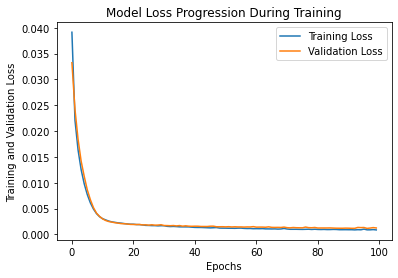

In [29]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progression During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

We also plotted the true values in relationship to the model predicitions to see how well the model does. We can see that there is a linear depiction from the graph, which means that the dataset performs well.

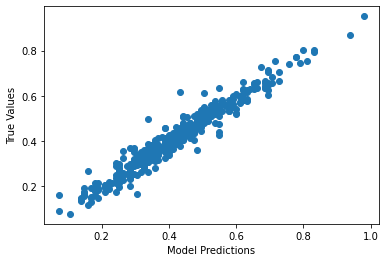

In [30]:
y_predict = ann_model.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

Converting the values back so that we can calculate the MSE, RMSE, and R2 values to further evaluate the model.

In [31]:
y_test = y_test.reshape(-1,1)
y_predict = y_predict.reshape(-1,1)

y_test_orig = scaler.inverse_transform(y_test)
y_predict_orig = scaler.inverse_transform(y_predict)

When calculating the values, we see that the values are low and reasonable numbers. The RMSE value is about 3.500, which means the model error is about 3.5 points off, which is very low. We also calculated the R2 value, which is the value that measures how the data fits on the regression line. The closer to 1 R2 is, the better the data fits on the regression line. We can see that the R2 value is 0.938, which is very close.

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 11.240092916458705
RMSE: 3.3526247801474454
MAE: 2.441216710619452
R2: 0.9434625022896924


Overall, we see that the neural network model performs very well with the dataset.